<h2> Исследование - Прогнозирование оттока клиентов<a class=\"tocSkip\"> </h2>

Есть такая тема, как отток клиентов. Штука неизбежная, потому что клиенты любой компании могут по множеству причин взять и перестать пользоваться ее продуктами или сервисами. Само собой, для компании отток — хоть и естественное, но не самое желаемое действие, поэтому все стараются этот отток минимизировать.

В нашем случае оператор связи хочет научиться прогнозировать отток клиентов.

Дадим определение что такое прогнозирование оттока — это процесс выявления клиентов, которые с наибольшей вероятностью покинут ваш бизнес или прекратят подписку на услуги, на основе использования ими продукта. Прогнозирование оттока имеет решающее значение, поскольку, помимо немедленной потери дохода, вызванной уходом клиента из бизнеса, возможно, что первоначальные затраты на привлечение этого клиента до сих пор не были покрыты его расходами.

Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

<h2> Цель работы <a class=\"tocSkip\"> </h2>

Построить модель которая умеет прогнозировать, уйдет ли клиент от оператора.

Была выбрана метрика качества AUC-ROC где значение должно быть не меньше 0.85.

<h2> Основные шаги <a class=\"tocSkip\"> </h2>

- Загрузка данных:
  - Вывести и изучить данные
- Первичный анализ данных:
  - Проверка на типы данных
  - Проверка признака на выбросы
  - Проверка на любые нулевые значения и дубликаты
- Предобработка данных:
  - Обьеденить таблицы
  - Привести признаки к нужному типу данных
  - Удалить или создать доп.признаки
- Исследовательский анализ данных:
  - Проверка корреляции признаков
  - Выявление закономерностей, связанных с целью
- Подготовить данные к обучению:
  - Провести кодирование OneHotEncoder
  - Поделить данные на выборки test и train
- Обучение модели:
  - Обучить модели на тренеровочной выборке
  - Проверка данных на тестовой выборке
- Общий вывод:
  - Описать каждый шаг проделоной работы
  - Финальный график с лучшими покозателями модели.
- Отчет о проделаной работе

<h2> Описание данных <a class=\"tocSkip\"> </h2>

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

Дамим обозначение признаков

- BeginDate – дата начала пользования услугами
- EndDate – дата окончания пользования услугами
- Type – тип оплаты: ежемесячный, годовой и двухгодичный платеж
- PaperlessBilling – безналичный расчет
- PaymentMethod – способ оплаты
- MonthlyCharges – ежемесячные траты на услуги
- TotalCharges – всего потрачено денег на услуги
- gender - гендер
- Dependents – наличие иждивенцев
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

<h2> Описание услуг <a class=\"tocSkip\"> </h2>

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь(InternetService).

Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет(InternetService).

Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection)
- Блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV)
- Каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.


In [1]:
!pip install -U catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.5 MB/s eta 0:00:00


In [2]:
!pip install -U lightgbm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.0 MB/s eta 0:00:00


In [3]:
!pip install -U phik -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.6 MB/s eta 0:00:00


In [4]:
!pip install -U skimpy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 10.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.24.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [5]:
!pip install --upgrade dask -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.12.1 requires dask==2022.12.1, but you have dask 2023.7.1 which is incompatible.


In [6]:
# Импоритруем библиотеки

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from tqdm import notebook
import phik
from skimpy import clean_columns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_val_score
)

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

## 1. Загрузка данных
### Вывести и изучить данные

In [7]:
# Прочитаем файл и запишем
# Используем метод Tru - Except для стабильного подключения, в случаее если первый вариант пути будет не обнаружен.

try:
  df_contract = pd.read_csv('/Users/ilyashirikov/Downloads/contract_new.csv')
  df_personal = pd.read_csv('/Users/ilyashirikov/Downloads/personal_new.csv')
  df_internet = pd.read_csv('/Users/ilyashirikov/Downloads/internet_new.csv')
  df_phone = pd.read_csv('/Users/ilyashirikov/Downloads/phone_new.csv')

except:
  df_contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
  df_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
  df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
  df_phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

In [8]:
# Создадим функцию для вывода всех необходимых методов показа информации

def info_func(df):
  display(df.head(10), df.info(), df.describe())

info_func(df_contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [9]:
info_func(df_personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
info_func(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [11]:
info_func(df_phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


### Краткий вывод

В таблице df_contract мы видим 7043 строк данных, в общем имеем 8 признаков которые имеют тип данных object, кроме столбца MonthlyCharges, там у нас тип Float.

В таблице df_personal мы видим 7043 строк данных, в общем имеем 5 признаков которые имеют тип данных object, кроме столбца SeniorCitizen, там у нас тип Int.

В таблице df_internet мы видим 5517 строк данных, это уже меньше чем в других таблицах, в общем имеем 8 признаков которые имеют тип данных object.

В таблице df_phone мы видим 6361 строк данных, это уже меньше чем в других таблицах, в общем имеем 2 признаков которые имеют тип данных object.


У всех талиц есть один общий и скорее всего одинаковый признак customerID, далее по нему обьеденю таблицы для удобства, так же приведу наименования столбцов к нижнему регистру.



## 2. Первичный анализ данных
### Проверить на типы данных

В таблице df_contract через функцию info видно что признаки BeginDate и EndDate нужно привести тип данных к datetime, признак TotalCharges к типу float, остальные признаки можно оставить прежними.

В остальных таблицах в основном бинарные ответы, изменять их типы смысла нет.

### Проверка признака на выбросы
По идее сейчас у нас один числовой признак, проверю его с помощью boxplot, явных выбросов в начале изучения данных я не выявил, остальные признаки проверим через уникальные значения.

(<Axes: >,
        MonthlyCharges
 count     7043.000000
 mean        64.761692
 std         30.090047
 min         18.250000
 25%         35.500000
 50%         70.350000
 75%         89.850000
 max        118.750000)

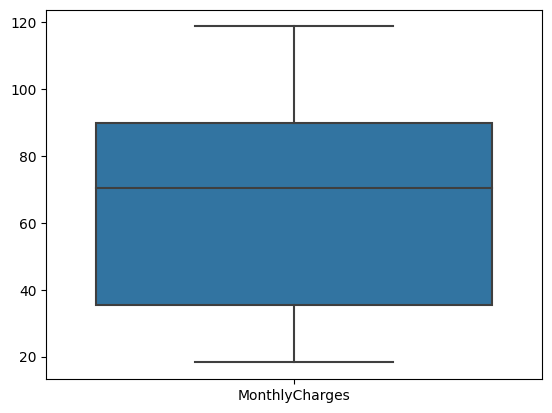

In [12]:
sns.boxplot(data=df_contract), df_contract.describe()

### Проверка на любые нулевые значения и дубликаты

In [13]:
df_contract.nunique()

customerID          7043
BeginDate             77
EndDate               67
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6658
dtype: int64

#### Краткий вывод

Проведя первичный анализ данных можно сказать что дубликатов в данных нет, пропуски и выбросы отсутствуют.

## 3. Предобработка данных
### Обьеденить таблицы

In [14]:
# Обьеденим для удобства таблицы по ключевому столбцу customerID

full_df = df_contract.merge(df_personal, how='left', on='customerID')
full_df = full_df.merge(df_internet, how='left', on='customerID')
full_df = full_df.merge(df_phone, how='left', on='customerID')

In [15]:
# customerID так как имеет уникальные значения сделаем индексом для каждой сточки данных

full_df = full_df.set_index('customerID')
full_df.head(10)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes


In [16]:
# После обьеденения появились пропуски, считаю верным заменить их на "No",
# так как если в таблице нет ID пользователя, значит этой услуги у него нет.

full_df.isna().sum()

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [17]:
full_df.fillna('No', inplace=True)

In [18]:
# Приводим название столбцов к нижнему регистру

full_df = clean_columns(full_df)

In [19]:
# Сформируем заранее целевой признак, сделаем это по столбцу end_date

full_df['target'] = 1
full_df.loc[full_df['end_date'] == 'No', 'target'] = 0

### Привести признаки к нужному типу данных

In [20]:
# В данных есть стоки где total_charges имеет значение пробела,
# Сохраним такие строки в отдельную переменную и далее удалим их что бы поменять тип данных столбца

indx = full_df.query('total_charges == " "')

In [21]:
full_df['begin_date'] = pd.to_datetime(full_df['begin_date'], format='ISO8601')
full_df['end_date'] = pd.to_datetime(full_df['end_date'].replace('No', '2020-02-01'), format='ISO8601')

full_df = full_df.drop(labels=indx.index)
full_df['total_charges'] = full_df['total_charges'].astype(float)

### Удалить или создать доп.признаки

In [22]:
full_df['days_to_checkin'] = (full_df['end_date'] - full_df['begin_date']).dt.days

In [23]:
# Уберем из таблицы begin_date и end_date дабы ибежать утечки данных.

full_df.drop(['begin_date', 'end_date'], axis=1, inplace=True)

#### Краткий вывод

В предобработке данных мы обьеденили все таблицы в одну едуную таблицу full_df.

При обьеденении появились пропуски которые мы заменили на значения "No".

 Так же:
- привели названия столбцов к нижнему регистру
- создали целевой признак на основе end_date
- изменили типы данных в столбцах где это было необходимо
- добавили новые признаки которые будут важны для алгоритмов машинного обучения - удалили столбцы begin_date и end_data что бы ибежать утечки данных

## 4. Исследовательский анализ данных
### Проверка корреляции признаков


interval columns not set, guessing: ['monthly_charges', 'total_charges', 'senior_citizen', 'target', 'days_to_checkin']


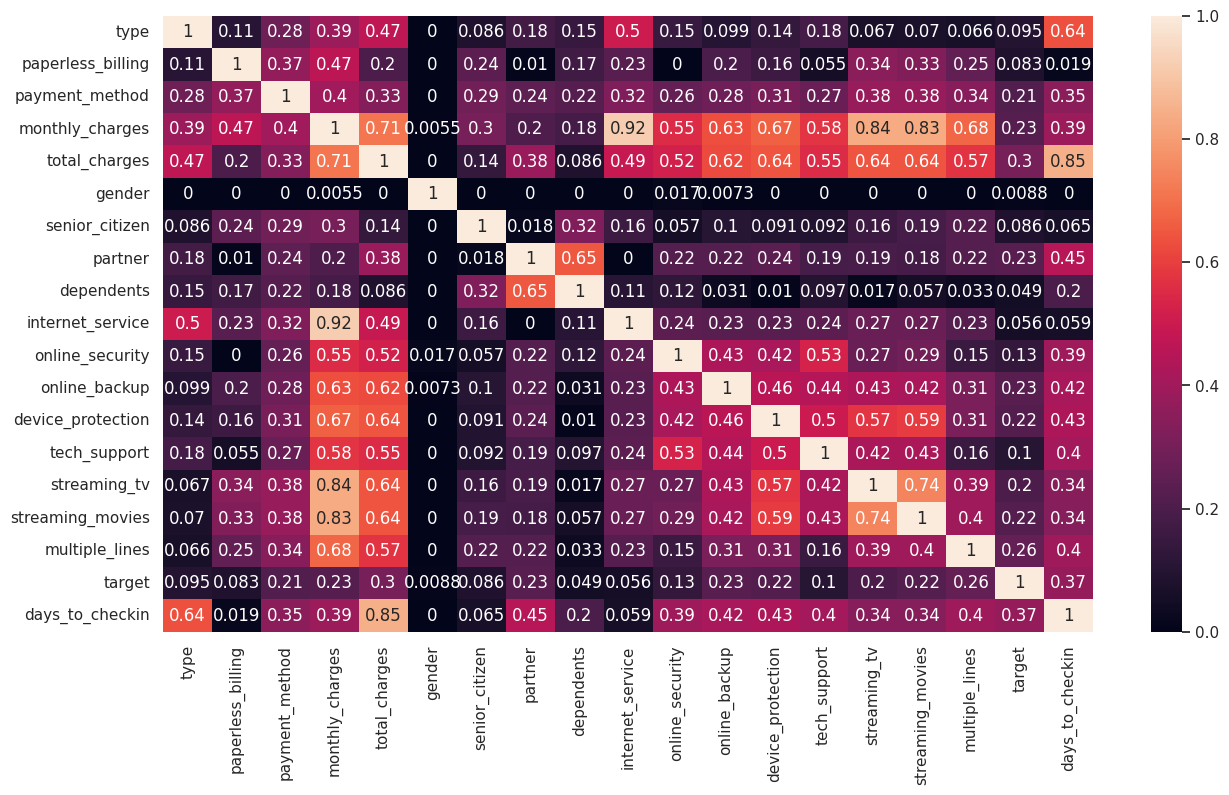

In [24]:
# После удаления не нужных признаков можно глянуть что у нас по корреляции поможет нам в этом phik


sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(full_df.phik_matrix(), annot=True);

Отметим важные моменты:
- По матрице корреляции видим явную созависимость по признакам InternetService, StreamingTV, StreamingMovies и MonthlyCharges, очевидно что цена за месяцную плату выше когда в пакете есть интернет, стриминговое телевидение и доп.фильмы.
- Так же есть зависимость между признаками TotalCharges и созданым признаком days_to_checkin, работает это так, чем больше дней пользовательв компании тем больше общая сумма трат, тут все логично.
- Так же есть корреляци между days_to_checkin и типом оплаты, интересно посмотреть в исследовательском аналезе что там за график.

### Выявление закономерностей, связанных с целью

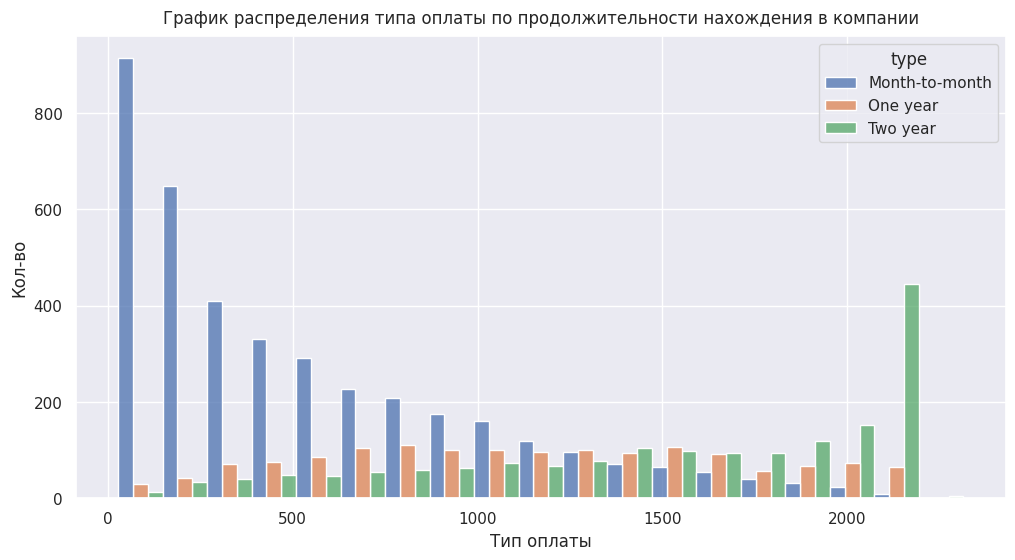

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(data=full_df,x='days_to_checkin', hue='type', multiple="dodge")
plt.title('График распределения типа оплаты по продолжительности нахождения в компании', y=1.01)
plt.xlabel('Тип оплаты')
plt.ylabel('Кол-во')
plt.show();

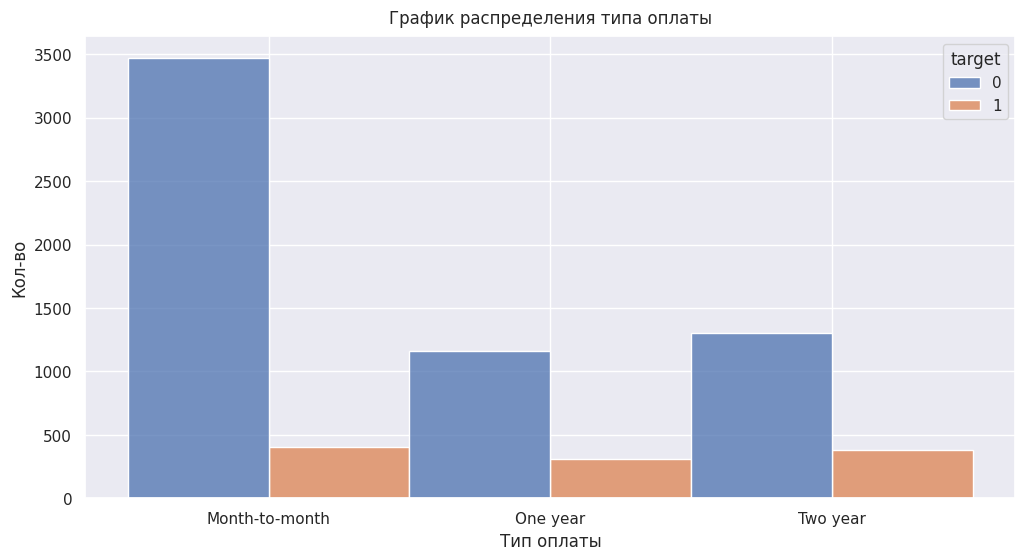

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(data=full_df,x='type', hue='target', multiple="dodge")
plt.title('График распределения типа оплаты', y=1.01)
plt.xlabel('Тип оплаты')
plt.ylabel('Кол-во')
plt.show();

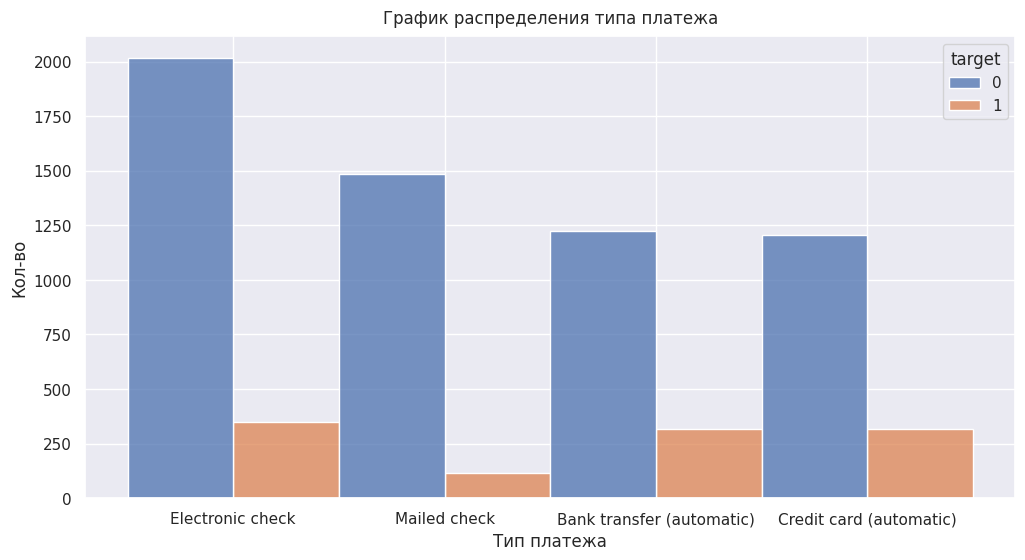

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data=full_df,x='payment_method', hue='target', multiple="dodge")
plt.title('График распределения типа платежа', y=1.01)
plt.xlabel('Тип платежа')
plt.ylabel('Кол-во')
plt.show();

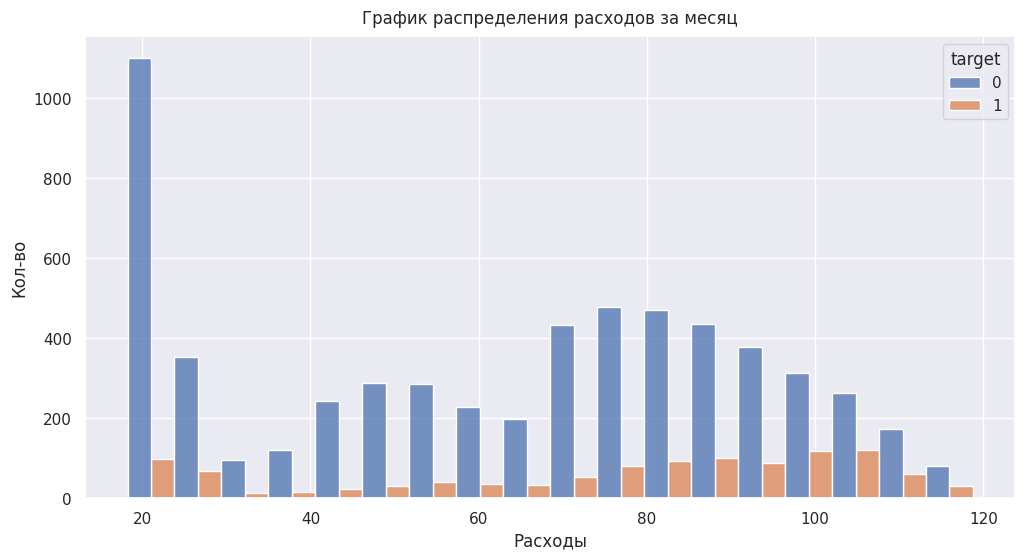

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data=full_df,x='monthly_charges', hue='target', multiple="dodge")
plt.title('График распределения расходов за месяц', y=1.01)
plt.xlabel('Расходы')
plt.ylabel('Кол-во')
plt.show();

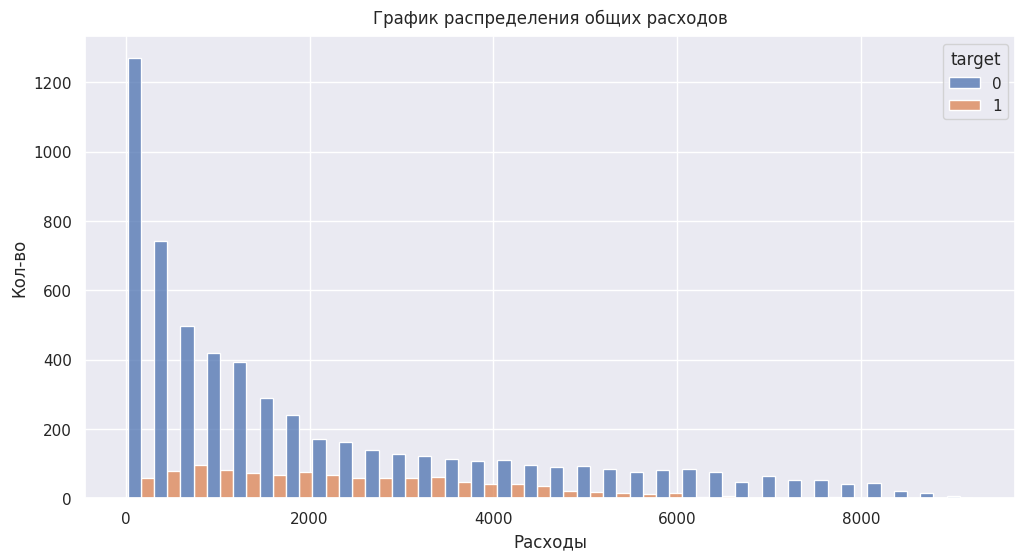

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data=full_df,x='total_charges', hue='target', multiple="dodge")
plt.title('График распределения общих расходов', y=1.01)
plt.xlabel('Расходы')
plt.ylabel('Кол-во')
plt.show();

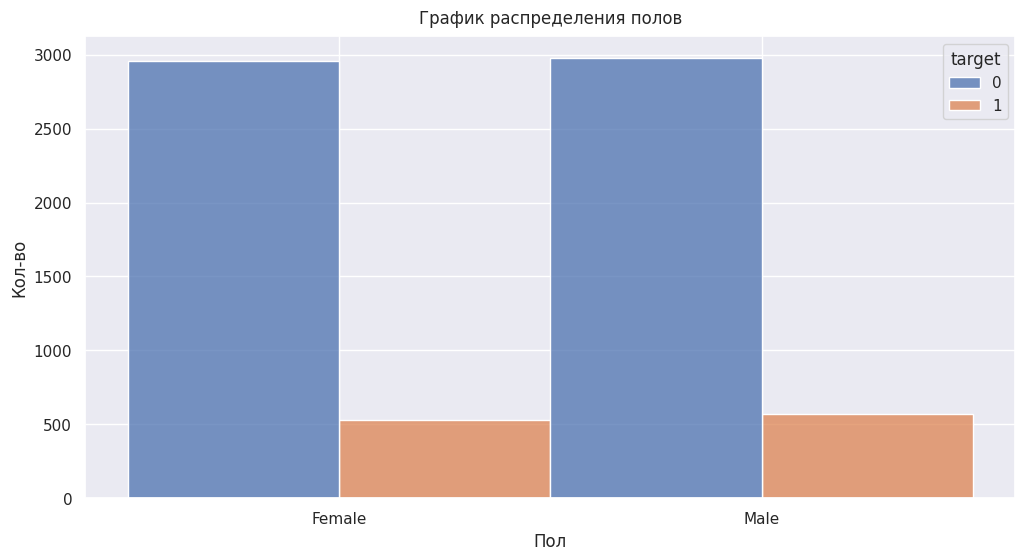

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data=full_df,x='gender', hue='target', multiple="dodge")
plt.title('График распределения полов', y=1.01)
plt.xlabel('Пол')
plt.ylabel('Кол-во')
plt.show();

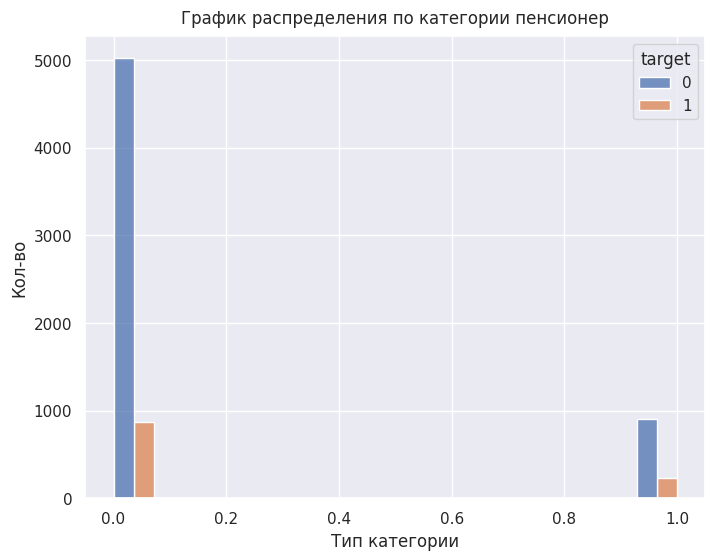

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data=full_df,x='senior_citizen', hue='target', multiple="dodge")
plt.title('График распределения по категории пенсионер', y=1.01)
plt.xlabel('Тип категории')
plt.ylabel('Кол-во')
plt.show();

#### Краткий вывод

И что же мы видим:

- По графику распределения типа оплаты по продолжительности нахождения в компании ясно что вновь пришедшиие пользователи предпочитают оплачивать подписку по месяцам, наблюдается такая закономерность чем больше человек находиться дней в компании тем чаще пользователи выбирают оплату раз в два года.
- По графику распределения типа оплаты видно что пользователи в большенстве своем предпочитают оплачивать подписку раз в месяц, такая группа больше остальных примерно в три раза, пользователи предпочитающие отплту врз в год и раз в два года по размерам почти одинаковы их кол-во не привышает 1.5 тыс.
- График распределения типа платежа показывает что пользователи больше предпочитают электронные чеки, категория чеки отправленые по почте имеют самый низкий показатель по оттоку пользователей.
- График распределения расходов за месяц показывает что у большого кол-во пользователей ежемесячная плата в районе 20(скорее всего доллары), так же есть повышеные зоны в районе 50  и 80 , скорее всего это фиксированые цены за пакет услуг. Так же есть незначительное повышение пользователей которые покинули компанию в зоне от 80 и выше, наверное такие пользователи устали от высокой цены и ушли в другую компанию.
- График распределения общих расходов показывает что в большенстве своем пользователи имеют расходы до 2 тыс., далее тенденция идет примерно на одном уровне и ближе к 6 тыс. начинает вновь падать. Так же отмечу что все ушедшие пользователи были в диапазоне от 0 до 4.5 тыс.
- График распределения полов показывает что гендер не влияет на уход пользователя, кол во оставшихся и ушедших пользователей почти эдентичны.
- Последний график говорит о том что пользователей со статусом пенсионер не так много, до 1 тыс. пользователей, в этой категории маньше ущедший людей, отмечу что пользователи до персионного возраста основная аудитория и по сраненению действующих и ушедших пользователей разница большая, в районе 4 тыс.

Получается общая картина такова что действующие пользователи это люди разных полов, в основном до персионнго возраста предпочитающие отплачивать подписку по категории 20, 50. и 80 долларов, им удобно оплачивать подписку раз в месяц и получать электронные уведомления.

Ушедшие пользователи так же до персионного возраста разных полов, основная масса уходила имеяя общие расходы примерно до 4.5 тыс., пользователи имеющие цену подписки от 90 до 110 имели склонность уйти, тип оплаты не влиял на решение уйти от услуг компании, так же отмечу что люди получавшие чек по почте уходили меньше всего согласно таблице.

## 5. Подготовить данные к обучению

### Поделить данные на выборки test и train


In [32]:
# Определим константу

RANDOM_STATE = 180723

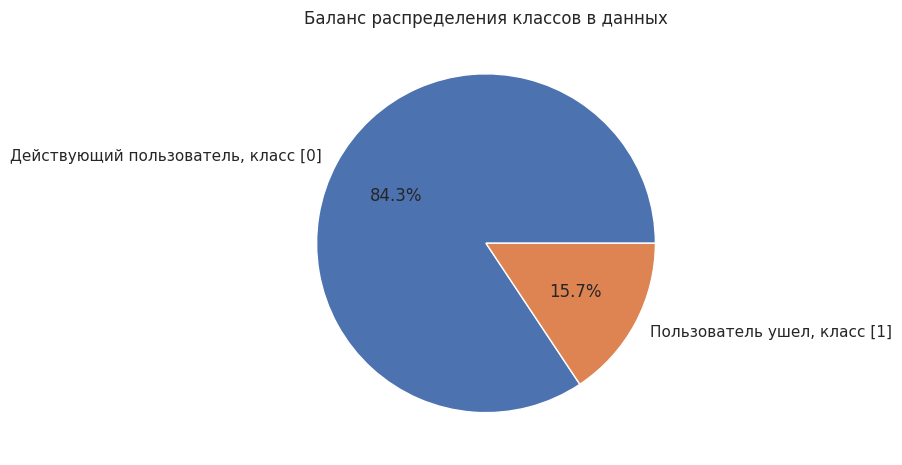

In [33]:
# Перед разбивкой глянем что у нас по балансу классов.

sns.set_style('darkgrid')
full_df['target'].value_counts(normalize=True).plot(kind='pie',figsize=[5.5,5.5], legend=False, autopct='%1.1f%%',labels=['Действующий пользователь, класс [0]','Пользователь ушел, класс [1]'])
plt.title('Баланс распределения классов в данных')
plt.ylabel('')
plt.show()

Ага, есть дисбаланс классов, воспользуемся standardscaler после того как проведем кадеровку данных.

In [34]:
# Разбиваем исходные данные на обучающую и тестовую выборки.

features_train, features_test, target_train, target_test = train_test_split(full_df.drop('target', axis = 1),
                                          full_df['target'],
                                          test_size = 0.25,
                                          random_state = RANDOM_STATE)

# Посмотрим на размеры

features_train.shape, features_test.shape, target_train.shape, target_test.shape

((5274, 18), (1758, 18), (5274,), (1758,))

### Провести кодирование OneHotEncoder

In [35]:

# Стандартизируем обучающую и тестовую выборку
# Избавляемся от категориальных признаков методом One hot encoder
ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown='infrequent_if_exist')

#категориальные признаки для OHE
ohe_features_train = features_train.select_dtypes(include='object').columns.to_list()
ohe_features_test = features_test.select_dtypes(include='object').columns.to_list()

#численные признаки
num_features_train = features_train.select_dtypes(exclude='object').columns.to_list()
num_features_test = features_test.select_dtypes(exclude='object').columns.to_list()

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
ohe.fit(features_train[ohe_features_train])

# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[
    ohe.get_feature_names_out()
] = ohe.transform(features_train[ohe_features_train])

features_test[
    ohe.get_feature_names_out()
] = ohe.transform(features_test[ohe_features_test])


# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(ohe_features_train, axis=1)
features_test = features_test.drop(ohe_features_test, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[num_features_train] = scaler.fit_transform(features_train[num_features_train])
features_test[num_features_test] = scaler.transform(features_test[num_features_test])

# смотрим на результат
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 2582-FFFZR to 0930-EHUZA
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         5274 non-null   float64
 1   total_charges                           5274 non-null   float64
 2   senior_citizen                          5274 non-null   float64
 3   days_to_checkin                         5274 non-null   float64
 4   type_One year                           5274 non-null   float64
 5   type_Two year                           5274 non-null   float64
 6   paperless_billing_Yes                   5274 non-null   float64
 7   payment_method_Credit card (automatic)  5274 non-null   float64
 8   payment_method_Electronic check         5274 non-null   float64
 9   payment_method_Mailed check             5274 non-null   float64
 10  gender_Male                             5274 non-n

#### Краткий вывод

В этом пункте мы:
- Разбили наши данные на четыре выборки features_train, features_test, target_train, target_test
- Проверили что есть дисбаланс классов и исправили этот момент с помощью мастабирования StandardScalerпо
- провели кадировку данных с помощью OneHotEncoder

Данные подготовленны, осталось подать из в модели.

## 6. Обучение модели:
### Обучить модели на тренеровочной выборке



### Logistic Regression

In [36]:
parameters = {'lr__fit_intercept' : [True,False],# определяет, следует ли учитывать константу в модели (0 или 1).
               'lr__penalty' : ['l1', 'l2'],#определяет тип штрафа, который используется для регуляризации модели.
               'lr__solver' :['saga','liblinear', 'lbfgs'],# определяет алгоритм оптимизации, используемый для поиска оптимальных весов модели.
               'lr__C' : [0.01, 0.1, 1] #определяет значение параметра C в регуляризаторе L1 или L2.
              }

# Kраткое описание что происходит в коде, добавляются параметры для GridSearchCV.
# Затем модель GridSearchCV используется для поиска оптимальных значений параметров модели, используя перекрестную проверку (cv=5).
# Наконец, модель оценивается на тренировочных данных (features_train и target_train), а лучший результат отображается в виде ROC-AUC.
# Процессы других моделей идентичны.

steps = [('lr', LogisticRegression(random_state = RANDOM_STATE, class_weight = 'balanced'))]
pipe = Pipeline(steps)
lr_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv=5)
lr_model.fit(features_train, target_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=180723))]),
             param_grid={'lr__C': [0.01, 0.1, 1],
                         'lr__fit_intercept': [True, False],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['saga', 'liblinear', 'lbfgs']},
             scoring='roc_auc')

### RandomForestClassifier

In [37]:
parameters = {
    'rfc__n_estimators' : [20,60,150,180],# количество деревьев в модели
    'rfc__criterion' : ['gini', 'entropy'],# критерий, используемый для оценки качества деревьев.
    'rfc__max_depth':[4,16,24] # максимальная глубина каждого дерева.
}
steps = [('rfc', RandomForestClassifier(random_state=RANDOM_STATE, class_weight = 'balanced', n_jobs = -1))]
pipe = Pipeline(steps)
rfc_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv=5)
rfc_model.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=180723))]),
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [4, 16, 24],
                         'rfc__n_estimators': [20, 60, 150, 180]},
             scoring='roc_auc')

### CatBoostClassifier

In [38]:
parameters = {'cbc__depth':[1,3,5,7,9,11,13],# глубина дерева решения
          'cbc__iterations':[200,100],# количество итераций
          'cbc__learning_rate':[0.001,0.01,0.1],# параметр регуляризации Лассо, который определяет коэффициент регуляризации.
          'cbc__loss_function': ['Logloss', 'CrossEntropy']# функция потерь, используемая для обучения модели.
          }

steps = [('cbc', CatBoostClassifier(random_state=RANDOM_STATE, auto_class_weights='Balanced'))]
pipe = Pipeline(steps)
cbc_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv=5)

cbc_model.fit(features_train, target_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.6723781	total: 1.22ms	remaining: 121ms
1:	learn: 0.6253792	total: 33.5ms	remaining: 1.64s
2:	learn: 0.5863394	total: 63.2ms	remaining: 2.04s
3:	learn: 0.5600860	total: 95.7ms	remaining: 2.3s
4:	learn: 0.5372363	total: 130ms	remaining: 2.48s
5:	learn: 0.5079398	total: 159ms	remaining: 2.5s
6:	learn: 0.4889847	total: 189ms	remaining: 2.51s
7:	learn: 0.4725425	total: 219ms	remaining: 2.51s
8:	learn: 0.4573985	total: 248ms	remaining: 2.5s
9:	learn: 0.4420613	total: 284ms	remaining: 2.55s
10:	learn: 0.4243218	total: 313ms	remaining: 2.53s
11:	learn: 0.4108624	total: 346ms	remaining: 2.54s
12:	learn: 0.3962376	total: 376ms	remaining: 2.52s
13:	learn: 0.3870132	total: 409ms	remaining: 2.51s
14:	learn: 0.3728682	total: 439ms	remaining: 2.49s
15:	learn: 0.3699745	total: 441ms	remaining: 2.31s
16:	learn: 0.3583487	total: 475ms	remaining: 2.32s
17:	learn: 0.3468805	total: 506ms	remaining: 2.3s
18:	learn: 0.3371597	tot

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cbc',
                                        <catboost.core.CatBoostClassifier object at 0x77fc0921ada0>)]),
             param_grid={'cbc__depth': [1, 3, 5, 7, 9, 11, 13],
                         'cbc__iterations': [200, 100],
                         'cbc__learning_rate': [0.001, 0.01, 0.1],
                         'cbc__loss_function': ['Logloss', 'CrossEntropy']},
             scoring='roc_auc')

### LGBMClassifier

In [39]:
parameters = {
    'lgb__learning_rate': [0.001, 0.01],
    'lgb__n_estimators': [4,16,24],
    'lgb__boosting_type' : ['gbdt', 'dart'], # тип бустинга, используемый в алгоритме
    'lgb__objective' : ['binary'] # цель обучения модели, которая может быть “binary”
    }
steps = [('lgb', LGBMClassifier(random_state=RANDOM_STATE, class_weight = 'balanced', n_jobs = -1))]
pipe = Pipeline(steps)
lgb_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv=5, verbose = 2)

lgb_model.fit(features_train, target_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 668, number of negative: 3551
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 4219, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END lgb__boosting_type=gbdt, lgb__learning_rate=0.001, lgb__n_estimators=4, lgb__objective=binary; total time=   0.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 668, number of negative: 3551
[LightGBM] [Warning] Auto-choosi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lgb',
                                        LGBMClassifier(class_weight='balanced',
                                                       n_jobs=-1,
                                                       random_state=180723))]),
             param_grid={'lgb__boosting_type': ['gbdt', 'dart'],
                         'lgb__learning_rate': [0.001, 0.01],
                         'lgb__n_estimators': [4, 16, 24],
                         'lgb__objective': ['binary']},
             scoring='roc_auc', verbose=2)

In [40]:
pd.DataFrame(data = [[round(lr_model.best_score_, 2)],
                    [round(rfc_model.best_score_, 2)],
                    [round(cbc_model.best_score_, 2)],
                    [round(lgb_model.best_score_, 2)]],
             index = ['Logistic Regression', 'RandomForestClassifier', 'CatBoostClassifier', 'LGBMClassifier'],
             columns = ['ROC-AUC']
             )

,ROC-AUC
Logistic Regression,0.77
RandomForestClassifier,0.82
CatBoostClassifier,0.87
LGBMClassifier,0.80


### Проверка данных на тестовой выборке


Мерика AUC-ROC = 0.89


<Figure size 1500x800 with 0 Axes>

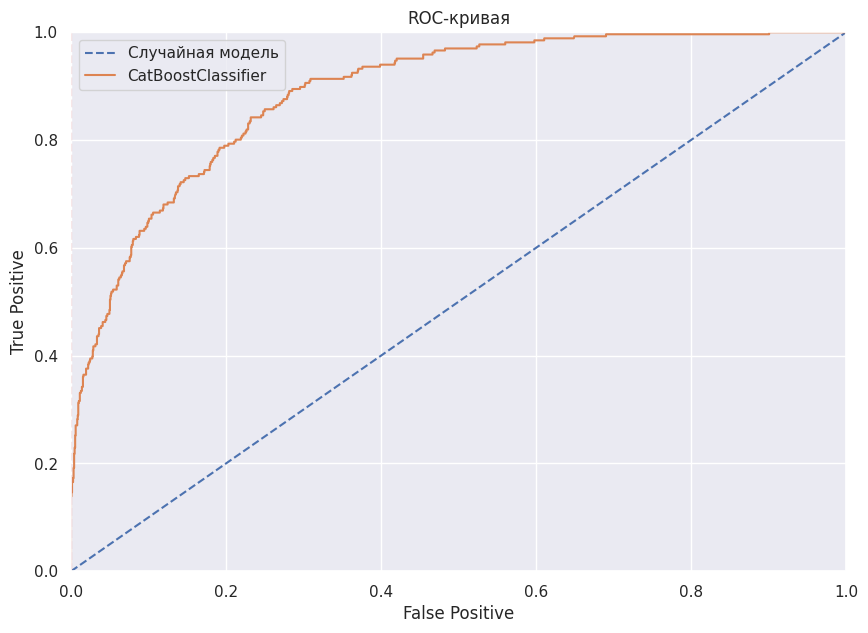

In [41]:
prediction = cbc_model.predict(features_test)
probabilities = cbc_model.predict_proba(features_test)
probabilities_one = probabilities[:, 1]

print('Мерика AUC-ROC =',round(roc_auc_score(target_test, probabilities_one), 2))

fpr_cbc, tpr_cbc, thresholds = roc_curve(target_test, probabilities_one)

# Находим точку равновесия
equilibrium_point = np.intersect1d(np.where(fpr_cbc == tpr_cbc)[0], np.linspace(0, 1, num=100))[0]

plt.figure()
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_cbc, tpr_cbc)
plt.axvline(x=equilibrium_point, color='r', linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','CatBoostClassifier'),
           loc= 'upper left')
plt.show();


#### Краткий вывод

В этом шаге мы обучили четыре модели где наилучший результат показала модель CatBoost, метрика равна 0.87, далее мы загрузили тестовые данные и метрика показала значение 0.89

Далее мы вывели график ROC-кривая. Площадь под ROC-кривой показывает, насколько хорошо модель может дифференцировать классы. Чем больше площадь под кривой, тем выше качество модели. Нет точки равновесия, такое может быть, если значения FPR и TPR не совпадают в конкретной точке.

## 7. Общий вывод
##Описать каждый шаг проделоной работы

Было проведено иследование по поиску модели которая будет прогназировать, уйдет ли клиент от оператора.

Подробный план проделаной работы:
- В первую обчередь мы загразули данные и посмотрели какие признаки есть в таблицах, у нас было четыре таблицы:
  - df_contract где 7043 строк данных
  - df_personal где 7043 строк данных
  - df_internet где 5517 строк данных
  - df_phone где 6361 строк данных

   Визуально пропусков или выбросов не было.
- Провели первичный анализ данных где проверили типы данных на соответствие признакам, убедились что нет выбросов, нулевых значений и дубликатов.
- В предобработке данных мы обьеденили для удобства таблицу назвав ее full_df, изменили типы данных у несоответствующих столбцов и удалили 11 строк из за присуцтвия пробелов в значении TotalCharges, так же добавили целевой признак target по столбцу EndDate, и удалили два признака BeginDate и EndDate что бы избежать утечки.
- Провели исследовательский анализ данных, тут мы вывели корреляцию по всем признакам, на основе этого с помощью визуализации нашли закономерности связаные с target. так же составили примерный портрет действующего пользователя и пользователей которые покинули компанию.
- В подготовке данных к обучению мы убедились что есть дисбаланс классов, мы учли это, разбив нашу таблицу на обучающую и тестовую выборку провели кадеровку данных с помощью OneHotEncoder, там же исправили ситуацию с дисбалансом классов с помощью StandardScaler.
- Провели обучение моделей, мы использовали два эффективных инструмента Pipeline и GridSearchCV для подбора лучших параметров, где лучшее значение на обучающей выборке показала модель CatBoost, значение метрики ROC-AUC = 0.87. Далее загрузили тестовую выборку где значение ROC-AUC = 0.89, что говорит нам о том что модель преодалела требование заказчика значение ROC-AUC = 0.85.

На основе иследования, могу рекомендовать оператору взять в работу модель CatBoost, так как это самая точная модель, которая сможет успешно предсказывать с какой вероятностью уйдет ли клиент.



### Финальный график с лучшими показателями


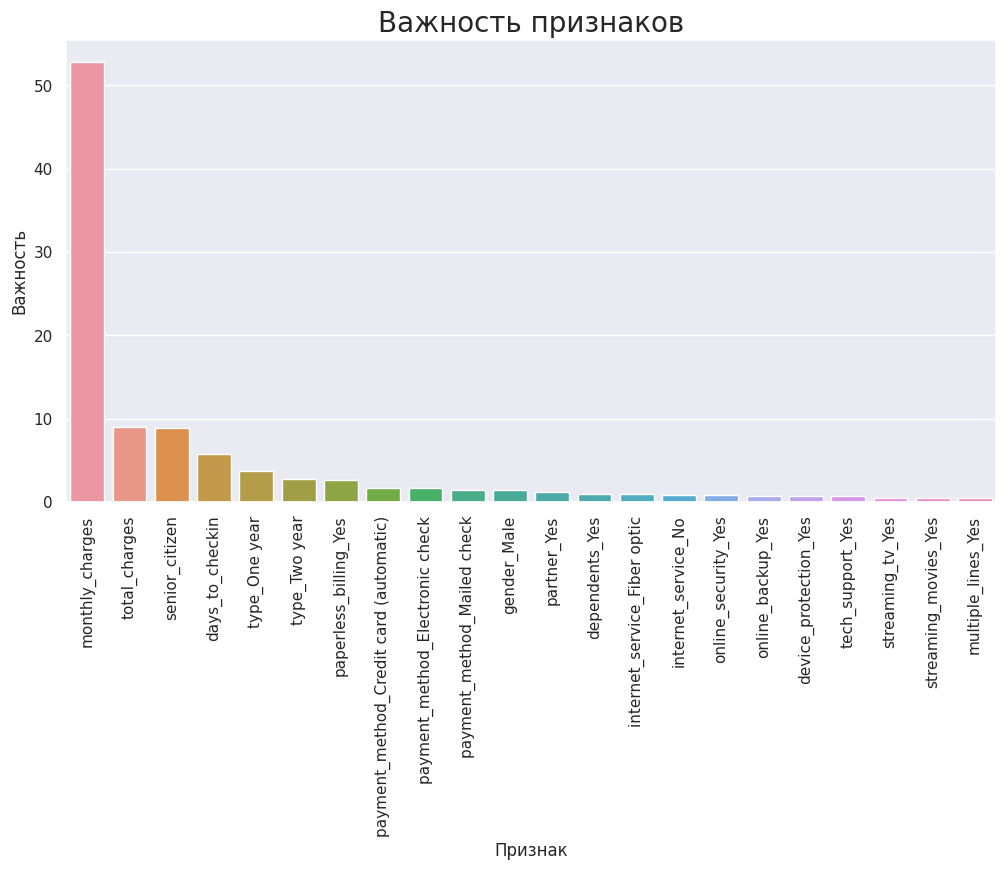

In [42]:
# Выыедем таблицу по выжности признака

plt.figure(figsize = (12,6))
sns.barplot(x=features_train.columns, y=sorted(cbc_model.best_estimator_._final_estimator.feature_importances_, reverse=True))
plt.title('Важность признаков', size=20)
plt.xticks(rotation='vertical')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show();


In [43]:
# Лучие гиперпараметры модели

cbc_model.best_params_

{'cbc__depth': 5,
 'cbc__iterations': 200,
 'cbc__learning_rate': 0.1,
 'cbc__loss_function': 'Logloss'}

In [44]:
# Признаки, которые использовались при обучении модели

features_train.columns

Index(['monthly_charges', 'total_charges', 'senior_citizen', 'days_to_checkin',
       'type_One year', 'type_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'partner_Yes', 'dependents_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'multiple_lines_Yes'],
      dtype='object')

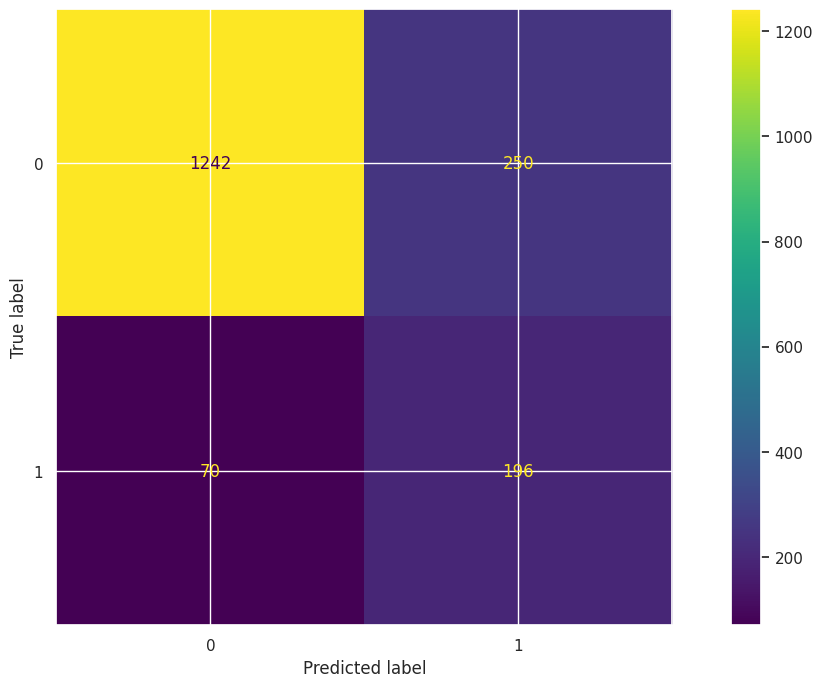

In [45]:
# Выведем матрицу ошибок для лучшей модели.

cm = confusion_matrix(target_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Модель сделала 70 ложно-негативных предсказаний и 250 ложно-положительных. В целях данной работы для нас наиболее важны позитивные предсказания модели, чтобы компания могла осуществлять действия для удержания клиентов. Правильных позитивных предсказаний модель сделала 196.



## 8. Отчет о проделаной работе

<h2> План основных шагов проекта <a class=\"tocSkip\"> </h2>

- Загрузка данных:
  - Вывести и изучить данные
- Первичный анализ данных:
  - Проверка на типы данных
  - Проверка признака на выбросы
  - Проверка на любые нулевые значения и дубликаты
- Предобработка данных:
  - Обьеденить таблицы
  - Привести признаки к нужному типу данных
  - Удалить или создать доп.признаки
- Исследовательский анализ данных:
  - Проверка корреляции признаков
  - Выявление закономерностей, связанных с целью
- Подготовить данные к обучению:
  - Провести кодирование OneHotEncoder
  - Поделить данные на выборки test и train
- Обучение модели:
  - Обучить модели на тренеровочной выборке
  - Проверка данных на тестовой выборке
- Общий вывод:
  - Описать каждый шаг проделоной работы
  - Финальный график с лучшими покозателями модели.
- Отчет о проделаной работе


Все работы были выполнены согласно данного плана, новых действий не потребовалось.

Отмечу ключивые моменты:
- При загрузке данных проблем не возникло, определили ход работы и ясно познакомились с данными.
- Основным этапом стал этап предобработки данных, в ходе первичного анализа пропусков в данных не было, хотя далее мы нашли одинадцать строк данных в признаке TotalCharges, это важная находка, на вход модели данные подали без аномалий, в противном случае метрика была бы искажена.
- Так же не маловажный этап стал исследовательский анализ данных, в этом пункте с помощью визуализации мы получили примерный портрет пользователя, это позволяет так же идентифицировать своих бужующих потенциальных клиентов.
- Была проведена кодировка данных, на этом этапе так же проблем не возникло, тут же провели мастабирование данных.
- Работа с моделями оказалась самым простым этапом, выбранные инструменты помогли избавиться от ненужного кода и ускорить работу модели.

Помимо всего, отмечу технический момент определения константы, RANDOM_STATE и дата выгрузки, дату мы не фиксировали, но она очень важна, так как определяет наш целевой признак.

По итогу работы пороговое значение метрики 0.85 преодалела одна модель CatBoost, у которой значение ROC-AUC = 0.89. Провели визуализанцию с помощью ROC-кривая где сравнили нашую модель со случайной. В отчете отметили важные признаки, лучшие гипер-параметры модели и вывели матрицу ошибок для модели.

Зафиксирую лучшие параметры для модели cat_model -
     
    'cbc__depth': 5,
    'cbc__iterations': 200,
    'cbc__learning_rate': 0.1,
    'cbc__loss_function': 'Logloss'

И зафексируем признаки на которых обучалась модель -
    
    'monthly_charges', 'total_charges', 'senior_citizen', 'days_to_checkin',
    'type_One year', 'type_Two year', 'paperless_billing_Yes',
    'payment_method_Credit card (automatic)',
    'payment_method_Electronic check', 'payment_method_Mailed check',
    'gender_Male', 'partner_Yes', 'dependents_Yes',
    'internet_service_Fiber optic', 'internet_service_No',
    'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
    'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
    'multiple_lines_Yes'